Praw: 5.0 cmH2O
Pplato: 15.0 mL/cmH2O
PIP: 20.0 cmH2O


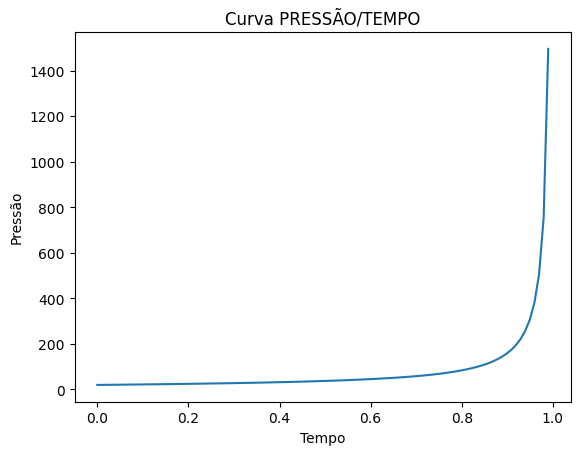

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a Pressão Resistiva das Vias Aéreas (Praw)
def calculate_praw(fluxo, raw):
    return fluxo * raw

# Função para calcular a Pressão Elástica do Sistema Respiratório (Pplato)
def calculate_pplato(vc, crs):
    return vc / crs

# Função para calcular a Pressão Inspiratória de Pico (PIP)
def calculate_pip(praw, pplato):
    return praw + pplato

# Parâmetros e valores de exemplo
fluxo = 0.5  # L/seg
raw = 10  # cmH2O/L/seg
vc = 750  # ml
crs = 50  # mL/cmH2O

# Calculando os valores
praw_value = calculate_praw(fluxo, raw)
pplato_value = calculate_pplato(vc, crs)
pip_value = calculate_pip(praw_value, pplato_value)

# Imprimindo os resultados
print(f"Praw: {praw_value} cmH2O")
print(f"Pplato: {pplato_value} mL/cmH2O")
print(f"PIP: {pip_value} cmH2O")

# Criando um gráfico simples
time_points = np.linspace(0, 1, 100)
pressure_curve = np.zeros_like(time_points)

# Simulando a alteração na curva PRESSÃO/TEMPO com base nas mudanças em Raw e Crs
# (Este é um exemplo simples, os valores reais podem variar)
for i, t in enumerate(time_points):
    pressure_curve[i] = calculate_pip(calculate_praw(fluxo, raw * (1 + t)), calculate_pplato(vc, crs * (1 - t)))

# Plotando a curva PRESSÃO/TEMPO
plt.plot(time_points, pressure_curve)
plt.title('Curva PRESSÃO/TEMPO')
plt.xlabel('Tempo')
plt.ylabel('Pressão')
plt.show()


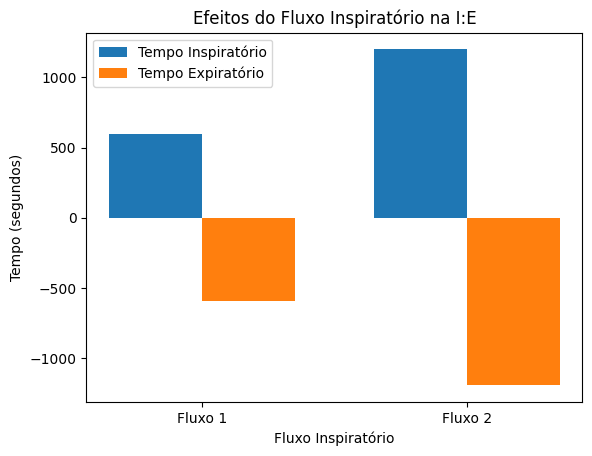

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o tempo inspiratório (Ti)
def calculate_ti(vc, fluxo):
    return vc / fluxo

# Parâmetros e valores de exemplo
vc = 600  # ml
frequencia_respiratoria = 12  # respirações por minuto
fluxo_1 = 60  # L/min
fluxo_2 = 30  # L/min

# Convertendo fluxo para ml/seg
fluxo_1_ml_seg = fluxo_1 / 60
fluxo_2_ml_seg = fluxo_2 / 60

# Calculando os tempos inspiratórios (Ti)
ti_1 = calculate_ti(vc, fluxo_1_ml_seg)
ti_2 = calculate_ti(vc, fluxo_2_ml_seg)

# Criando um gráfico de barras para representar os efeitos do fluxo na I:E
labels = ['Fluxo 1', 'Fluxo 2']
tempos_inspiratorios = [ti_1, ti_2]
tempos_expiratorios = [60 / frequencia_respiratoria - ti_1, 60 / frequencia_respiratoria - ti_2]

bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(index, tempos_inspiratorios, bar_width, label='Tempo Inspiratório')
bar2 = ax.bar(index + bar_width, tempos_expiratorios, bar_width, label='Tempo Expiratório')

ax.set_xlabel('Fluxo Inspiratório')
ax.set_ylabel('Tempo (segundos)')
ax.set_title('Efeitos do Fluxo Inspiratório na I:E')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


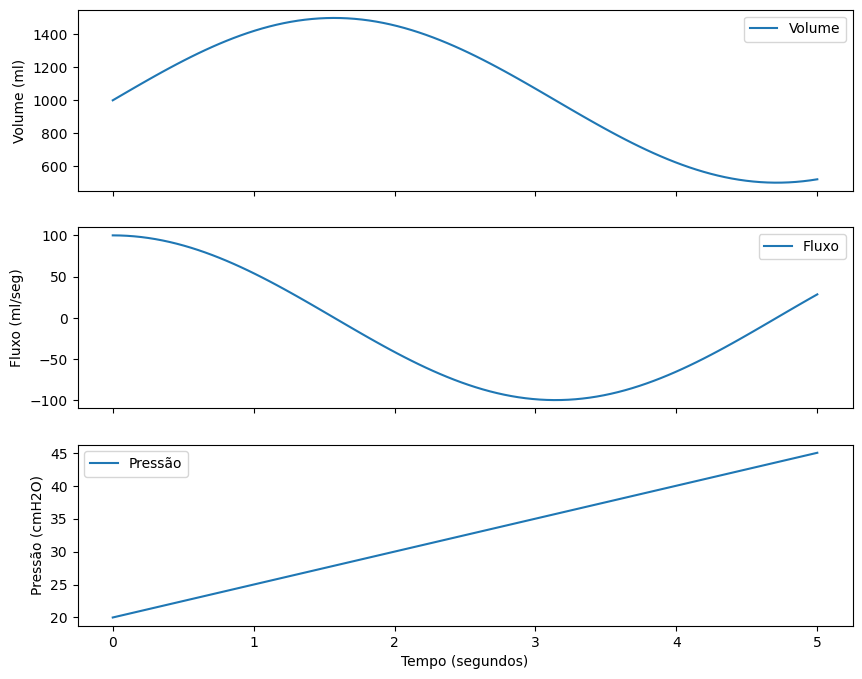

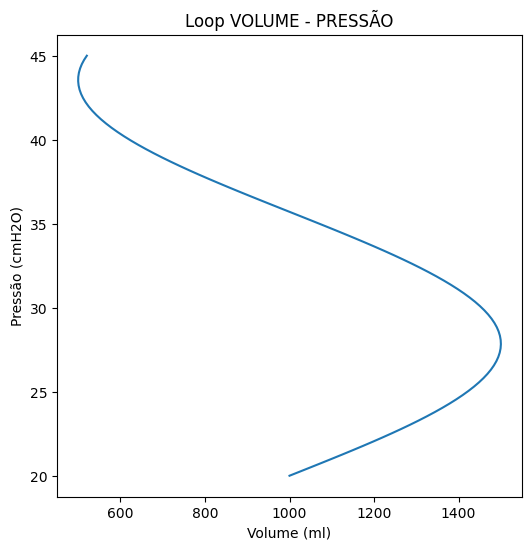

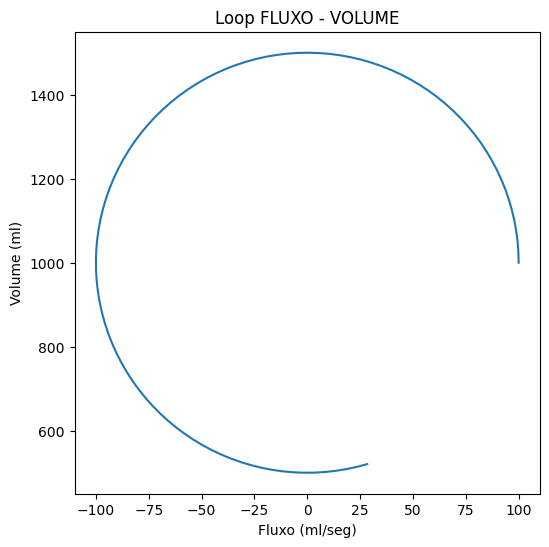

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados de exemplo para representar os parâmetros
tempo = np.linspace(0, 5, 100)
volume = 500 * np.sin(tempo) + 1000
fluxo = 100 * np.cos(tempo)
pressao = 5 * tempo + 20

# Criando subplots para representar os gráficos
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Gráfico de VOLUME em função do TEMPO
axs[0].plot(tempo, volume, label='Volume')
axs[0].set_ylabel('Volume (ml)')
axs[0].legend()

# Gráfico de FLUXO em função do TEMPO
axs[1].plot(tempo, fluxo, label='Fluxo')
axs[1].set_ylabel('Fluxo (ml/seg)')
axs[1].legend()

# Gráfico de PRESSÃO em função do TEMPO
axs[2].plot(tempo, pressao, label='Pressão')
axs[2].set_xlabel('Tempo (segundos)')
axs[2].set_ylabel('Pressão (cmH2O)')
axs[2].legend()

plt.show()

# Criando o "loop" VOLUME - PRESSÃO
plt.figure(figsize=(6, 6))
plt.plot(volume, pressao)
plt.title('Loop VOLUME - PRESSÃO')
plt.xlabel('Volume (ml)')
plt.ylabel('Pressão (cmH2O)')
plt.show()

# Criando o "loop" FLUXO - VOLUME
plt.figure(figsize=(6, 6))
plt.plot(fluxo, volume)
plt.title('Loop FLUXO - VOLUME')
plt.xlabel('Fluxo (ml/seg)')
plt.ylabel('Volume (ml)')
plt.show()


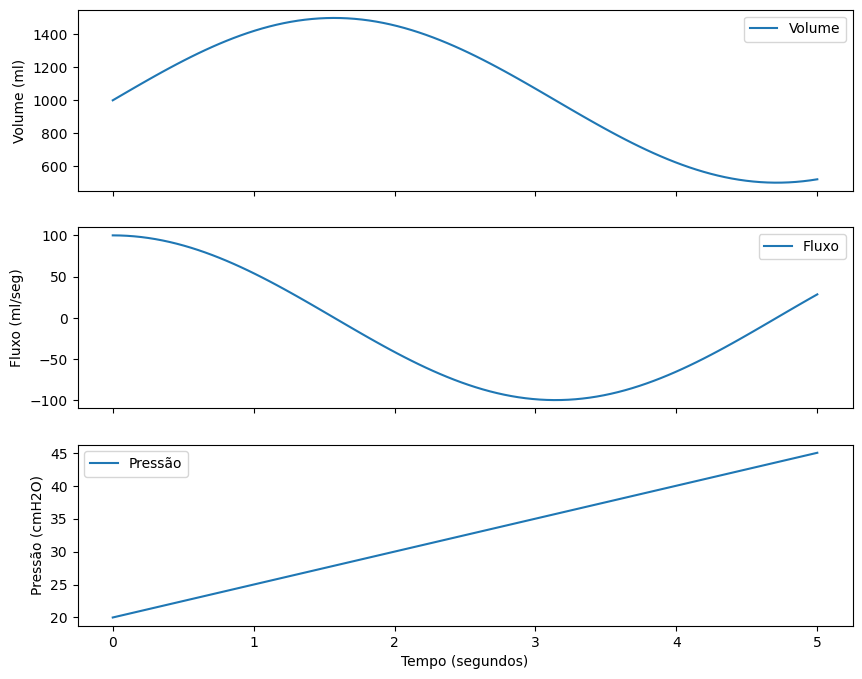

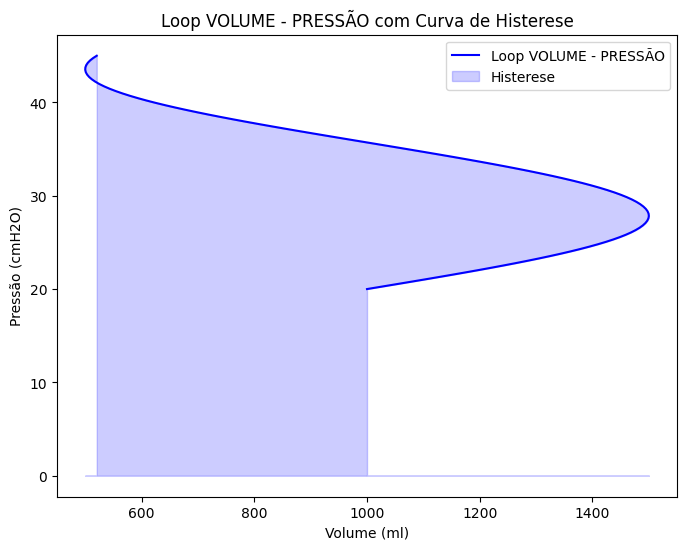

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados de exemplo para representar os parâmetros
tempo = np.linspace(0, 5, 100)
volume = 500 * np.sin(tempo) + 1000
fluxo = 100 * np.cos(tempo)
pressao = 5 * tempo + 20

# Criando subplots para representar os gráficos
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Gráfico de VOLUME em função do TEMPO
axs[0].plot(tempo, volume, label='Volume')
axs[0].set_ylabel('Volume (ml)')
axs[0].legend()

# Gráfico de FLUXO em função do TEMPO
axs[1].plot(tempo, fluxo, label='Fluxo')
axs[1].set_ylabel('Fluxo (ml/seg)')
axs[1].legend()

# Gráfico de PRESSÃO em função do TEMPO
axs[2].plot(tempo, pressao, label='Pressão')
axs[2].set_xlabel('Tempo (segundos)')
axs[2].set_ylabel('Pressão (cmH2O)')
axs[2].legend()

plt.show()

# Criando o "loop" VOLUME - PRESSÃO com curva de histerese
plt.figure(figsize=(8, 6))
plt.plot(volume, pressao, label='Loop VOLUME - PRESSÃO', color='blue')
plt.title('Loop VOLUME - PRESSÃO com Curva de Histerese')
plt.xlabel('Volume (ml)')
plt.ylabel('Pressão (cmH2O)')

# Adicionando a curva de histerese
plt.fill_between(volume, pressao, color='blue', alpha=0.2, label='Histerese')

plt.legend()
plt.show()


In [28]:
%pip install ipywidgets



In [29]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def simulate_respiratory_abnormality(abnormality, duration=30):
    # Simulando dados de volume, fluxo e pressão com base na anormalidade respiratória
    time = np.arange(0, duration, 0.1)
    volume, fluxo, pressao = np.zeros_like(time), np.zeros_like(time), np.zeros_like(time)

    if abnormality == 'eupneia':
        volume = 500 * np.sin(2 * np.pi * time / 10) + 1000
    elif abnormality == 'bradipneia':
        volume = 300 * np.sin(2 * np.pi * time / 15) + 1000
    elif abnormality == 'apneia':
        pass  # Volume, fluxo e pressão são mantidos em zero
    elif abnormality == 'taquipneia':
        volume = 800 * np.sin(2 * np.pi * time / 5) + 1000
    elif abnormality == 'hiperpneia':
        volume = 500 * np.sin(2 * np.pi * time / 5) + 1500
    elif abnormality == 'cheines-stokes':
        volume = 500 * np.sin(2 * np.pi * time / 10) + 1000
        fluxo = 100 * np.cos(2 * np.pi * time / 10)
    elif abnormality == 'biot':
        volume = 500 * np.sin(2 * np.pi * time / 5) + 1000
        fluxo = 150 * np.cos(2 * np.pi * time / 5)
        pressao = 10 * time / duration

    return time, volume, fluxo, pressao

def plot_respiratory_abnormality(abnormality):
    time, volume, fluxo, pressao = simulate_respiratory_abnormality(abnormality)

    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    axs[0].plot(time, volume, label='Volume')
    axs[0].set_ylabel('Volume (ml)')
    axs[0].legend()

    axs[1].plot(time, fluxo, label='Fluxo')
    axs[1].set_ylabel('Fluxo (ml/seg)')
    axs[1].legend()

    axs[2].plot(time, pressao, label='Pressão')
    axs[2].set_xlabel('Tempo (segundos)')
    axs[2].set_ylabel('Pressão (cmH2O)')
    axs[2].legend()

    plt.suptitle(f'Simulação de {abnormality.capitalize()}')
    plt.show()

# Criando um menu interativo
abnormality_dropdown = widgets.Dropdown(
    options=['eupneia', 'bradipneia', 'apneia', 'taquipneia', 'hiperpneia', 'cheines-stokes', 'biot'],
    value='eupneia',
    description='Anormalidade Respiratória:'
)

# Atualizando os gráficos conforme a escolha no menu interativo
interact(plot_respiratory_abnormality, abnormality=abnormality_dropdown)


interactive(children=(Dropdown(description='Anormalidade Respiratória:', options=('eupneia', 'bradipneia', 'ap…

<function __main__.plot_respiratory_abnormality(abnormality)>

In [1]:
%pip install seaborn

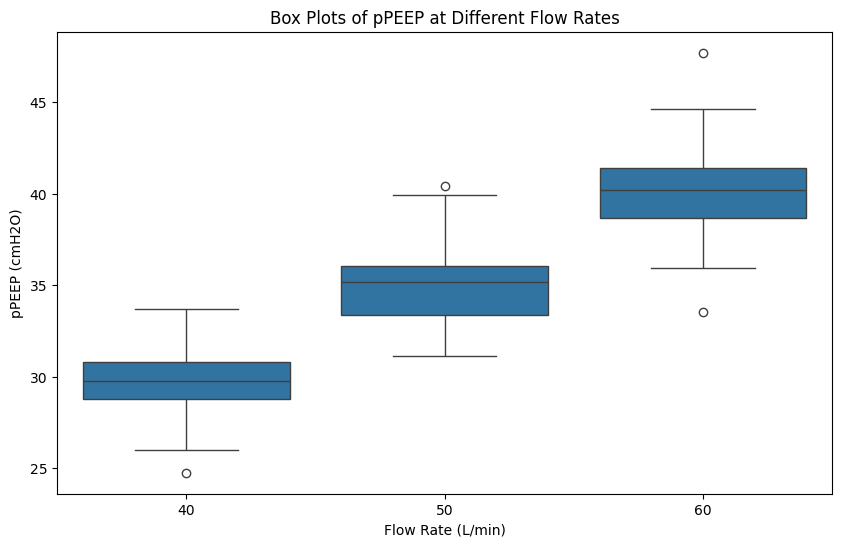

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating data for pPEEP at different flow rates
np.random.seed(42)  # Setting seed for reproducibility
flow_rates = [40, 50, 60]
data = {flow: np.random.normal(loc=10 + 0.5 * flow, scale=2, size=100) for flow in flow_rates}

# Creating a list of tuples for seaborn boxplot
plot_data = [(value, label) for label, values in data.items() for value in values]

# Creating a DataFrame from the list
import pandas as pd
df = pd.DataFrame(plot_data, columns=['pPEEP (cmH2O)', 'Flow Rate (L/min)'])

# Creating boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Flow Rate (L/min)', y='pPEEP (cmH2O)', data=df)
plt.title('Box Plots of pPEEP at Different Flow Rates')
plt.show()


In [3]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
freqValues = [1, 5, 9, 12, 15]
ampValues = [1, 3, 5]


In [5]:
valsToPlot = []
valsLim = 0
meanValue = 0
deviation = 0
ymax, ymin = 0, 0

In [ ]:
import math

# Lista para armazenar a amostra de seno
sinSample = []

# Loop para gerar amostras de seno a cada terceiro grau de um círculo
for i in range(0, 361, 3):
    # Imprime o ângulo em graus
    print(i)
    
    # Calcula o seno do ângulo em radianos
    sin_value = math.sin(math.radians(i))
    
    # Imprime o valor do seno
    print(sin_value)
    
    # Multiplica o valor do seno por 409.5 e arredonda para três casas decimais
    rounded_value = round(sin_value * 409.5, 3)
    
    # Adiciona o valor arredondado à lista sinSample
    sinSample.append(rounded_value)

# Imprime o comprimento da lista sinSample
print(len(sinSample))

# Imprime a lista completa sinSample
print(sinSample)



In [15]:
for m in freqValues:
    for n in ampValues:
        fileName = ['pressao' + str(n) + 'amp' + str(m) + 'hz', 'fluxo_' + str(n) + 'amp_' + str(m) + 'hz']
        titles = ['Fluxo(SLM)', 'Pressão(cmH₂O)']
        for x in fileName:
            for line in open(x + '.txt', 'r'):
                values = [float(s) for s in line.split("\r\n")]
                valsToPlot.append(values)
                valsLim = valsLim + 1
                if 'fluxo' not in x:
                    if valsLim == 502:
                        break
                else:
                    if valsLim == 200:
                        break

            ymax = max(valsToPlot)
            ymin = min(valsToPlot)
            meanValue = round(np.mean(valsToPlot), 2)
            deviation = round(np.std(valsToPlot), 2)

            if 'fluxo' in x:
                plt.subplot(2, 1, 1)
                plt.plot(valsToPlot, color='#a08dc9', linestyle='solid', linewidth=1.0)
                plt.title(titles[0])
            else:
                plt.subplot(2, 1, 2)
                plt.plot(valsToPlot, color='#96c685', linestyle='solid', linewidth=1.0)
                plt.title(titles[1])
            plt.annotate('Média: ' + str(meanValue) + ', Desvio Padrão: ' + str(deviation) + ', ymax: ' + str(ymax) + ', ymin: ' + str(ymin), xy=(1, 0), xycoords='axes fraction', fontsize=12, horizontalalignment='right', verticalalignment='bottom')
            if 'fluxo' not in x:
                plt.xlim((0, 501))
            else:
                plt.xlim((0, 199))
            plt.grid(True)
            valsToPlot = []
            valsLim = 0
            plt.tight_layout()
            plt.savefig(str(n) + 'amp_' + str(m) + 'freq.png', bbox_inches='tight')
            plt.clf()


<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'pressao1amp1hz.txt'